This notebook is used to use scatter plot to demonstrate distribution of trials with different stimuli and motion type. 

In [1]:
import os, pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.io as scio
import pandas as pd

In [2]:
dname = '1208_ab.mat'
data = scio.loadmat(f'./scatter_data/{dname}')
data['trl_stim'], data['trl_mot'], data['stim_lbl'], data['motion_lbl'] = np.squeeze((data['trl_stim'], data['trl_mot'], data['stim_lbl'].T, data['motion_lbl'].T), axis=-1)

dict_to_pd = {'X_stim': data['trl_stim'], 'X_mot': data['trl_mot'], 
              'stimulus': data['stim_lbl'], 'motion': data['motion_lbl']}
df = pd.DataFrame(dict_to_pd)

# change dtype
dtype_dict = {'X_stim': np.float64, 'X_mot': np.float64, 
              'stimulus': np.uint8, 'motion': np.uint8}
df = df.astype(dtype_dict)
df['kind'] = df['stimulus'] + df['motion'] * 4

In [3]:
df.head(), df.shape

(     X_stim      X_mot  stimulus  motion  kind
 0  0.185782  14.639399         1       1     5
 1 -1.949596  15.068535         2       1     6
 2  0.659408  25.327833         2       0     2
 3  4.520093  17.145250         2       1     6
 4  3.186475  26.851718         2       0     2,
 (243, 5))

plot scatter plot, with 4 stimulus in 4 colors and 2 motions in 2 marker shape.

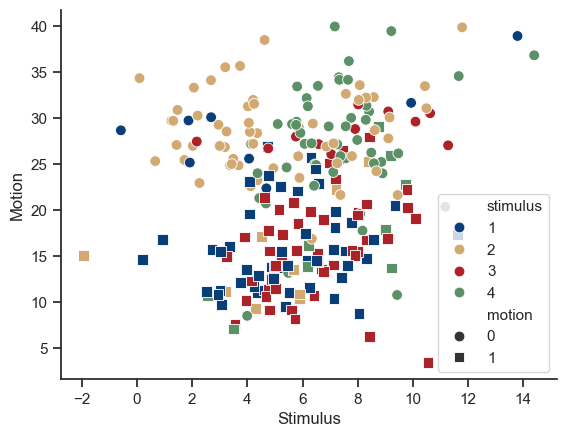

In [4]:
# Define color palette for stimuli
palette = ['#0a3e78', '#d3a972', '#AB2328', '#5c9167']
stim_type = [1, 2, 3, 4]
stimulus_palette = dict(zip(stim_type, palette))
# Define marker shapes for motions
motion_markers = {0: 'o', 1: 's'}
# fontsize
fontsize = 6
# set sns theme
sns.set_theme(style="ticks")
# save dpi
image_save_dpi = 500
# save folder
image_folder = "final"
# save format
image_format = "tif"
# save date
date = dname.split('_')[0]
# subject
monkey = dname.split('_')[1][:-4]

# Plot scatter plot
sns.scatterplot(data=df, x='X_stim', y='X_mot', hue='stimulus', 
                style='motion', legend='brief',
                palette=palette, markers=motion_markers, s=60)
sns.despine()
plt.xlabel('Stimulus')
plt.ylabel('Motion')
plt.legend()
plt.show()

Plot distribution on x-axis and y-axis

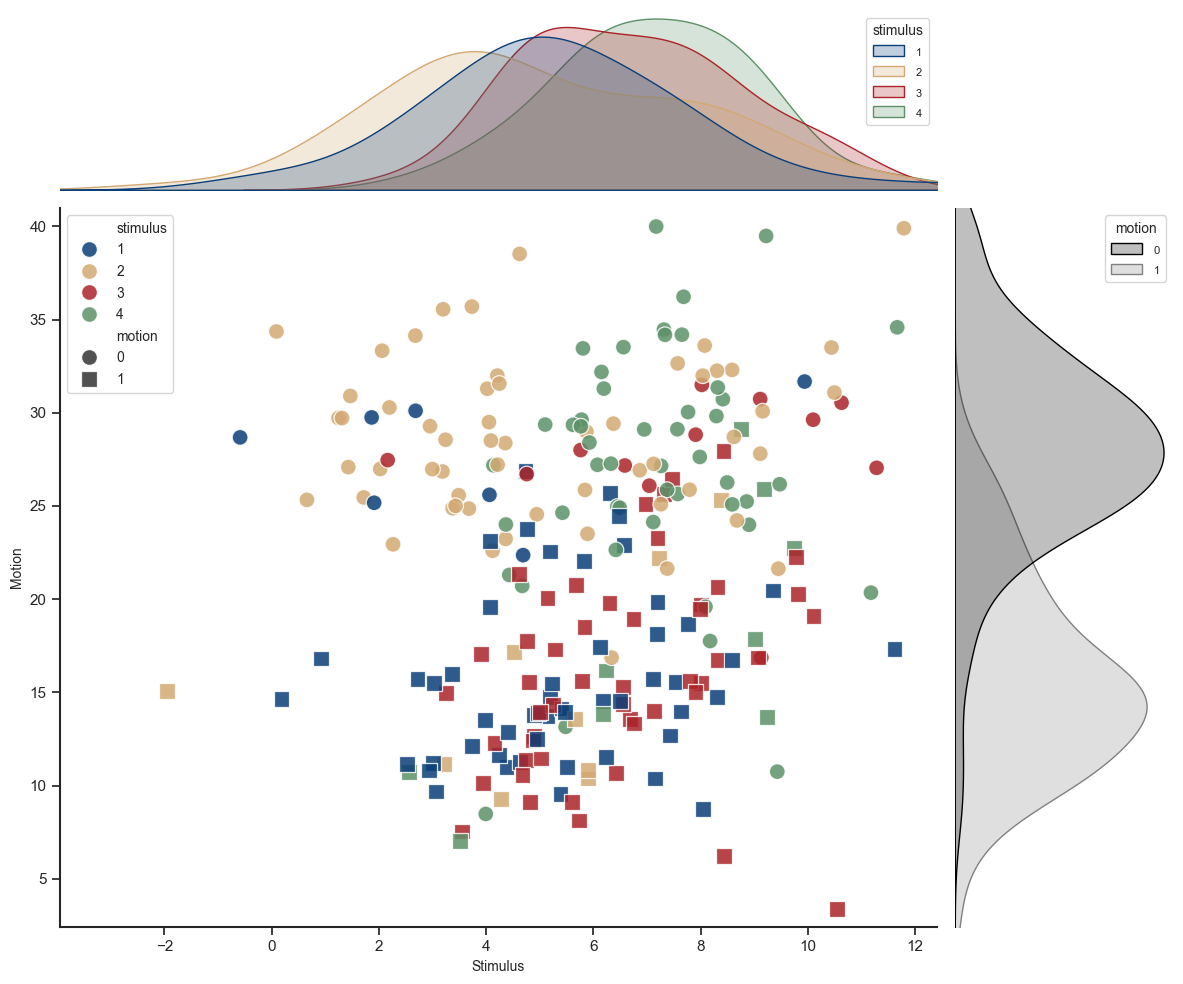

In [5]:
legend_title_size = 12
legend_text_size = 10
fontsize = 10
line_width = 1.5

fig, axes = plt.subplots(2, 2, figsize=(12, 10), 
                         sharex='col', sharey='row',
                         width_ratios=[4, 1], height_ratios=[1, 4])
axes[0, 1].axis('off')

sns.set_theme(style='ticks', palette=palette, font='Arial', font_scale=1)
ax = sns.scatterplot(data=df, x='X_stim', y='X_mot', hue='stimulus', 
                style='motion', legend='full', alpha=0.85,
                palette=palette, markers=motion_markers, s=130,
                ax=axes[1, 0])
sns.despine()
ax.spines['left'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
axes[1, 0].set_xlabel('Stimulus', fontsize=fontsize)
axes[1, 0].set_ylabel('Motion', fontsize=fontsize)
axes[1, 0].set_xlim([min(df['X_stim'])-2, max(df['X_stim'])-2])
axes[1, 0].set_ylim([min(df['X_mot'])-1, max(df['X_mot'])+1])
plt.setp(axes[1, 0].get_legend().get_texts(), fontsize=legend_text_size)
plt.setp(axes[1, 0].get_legend().get_title(), fontsize=legend_title_size)

sns.kdeplot(data=df, x='X_stim', hue='stimulus', fill=True,
             palette=palette, ax=axes[0, 0])
axes[0, 0].axis('off')
plt.setp(axes[0, 0].get_legend().get_texts(), fontsize=legend_text_size-2)
plt.setp(axes[0, 0].get_legend().get_title(), fontsize=legend_title_size-2)

sns.kdeplot(data=df, y='X_mot', hue='motion', fill=True, 
             palette=['black', 'gray'], ax=axes[1, 1])
axes[1, 1].axis('off')
plt.setp(axes[1, 1].get_legend().get_texts(), fontsize=legend_text_size-2)
plt.setp(axes[1, 1].get_legend().get_title(), fontsize=legend_title_size-2)

plt.tight_layout()

# fig save
image_name = f"./{image_folder}/{date}_{monkey}_scatter.tif"
fig.savefig(image_name, format=image_format, dpi=image_save_dpi)